Lab - EDA Univariate Analysis: Diving into Amazon UK Product Insights
Objective: Explore the product listing dynamics on Amazon UK to extract actionable business insights. By understanding the distribution, central tendencies, and relationships of various product attributes, businesses can make more informed decisions on product positioning, pricing strategies, and inventory management.

Dataset: This lab utilizes the Amazon UK product dataset which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.

Part 1: Understanding Product Categories
Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

Frequency Tables:

Generate a frequency table for the product category.
Which are the top 5 most listed product categories?
Visualizations:

Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.
For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

Part 2: Delving into Product Pricing
Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

Measures of Centrality:

Calculate the mean, median, and mode for the price of products.
What's the average price point of products listed? How does this compare with the most common price point (mode)?
Measures of Dispersion:

Determine the variance, standard deviation, range, and interquartile range for product price.
How varied are the product prices? Are there any indicators of a significant spread in prices?
Visualizations:

Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..
Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.
Part 3: Unpacking Product Ratings
Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

Measures of Centrality:

Calculate the mean, median, and mode for the rating of products.
How do customers generally rate products? Is there a common trend?
Measures of Dispersion:

Determine the variance, standard deviation, and interquartile range for product rating.
Are the ratings consistent, or is there a wide variation in customer feedback?
Shape of the Distribution:

Calculate the skewness and kurtosis for the rating column.
Are the ratings normally distributed, or do they lean towards higher or lower values?
Visualizations:

Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?
Submission: Submit a Jupyter Notebook which contains code and a business-centric report summarizing your findings.

In [8]:
## setting up the notebook.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [7]:
## importing DataSet: 

df = pd.read_csv('amz_uk_price_prediction_dataset.csv')

df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


## Part 1: Understanding Product Categories Business 

Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?



In [9]:
## Frequency Tables: Generate a frequency table for the product category

frequency_table = df['category'].value_counts()

# Calculating the proportion of each unique value in product category

proportion_table = df['category'].value_counts(normalize=True)

frequency_table, proportion_table

(category
 Sports & Outdoors                         836265
 Beauty                                     19312
 Handmade Clothing, Shoes & Accessories     19229
 Bath & Body                                19092
 Birthday Gifts                             18978
                                            ...  
 Alexa Built-In Devices                       107
 Motorbike Chassis                            107
 Plugs                                        107
 Smart Home Security & Lighting               104
 Smart Speakers                                54
 Name: count, Length: 296, dtype: int64,
 category
 Sports & Outdoors                         0.342219
 Beauty                                    0.007903
 Handmade Clothing, Shoes & Accessories    0.007869
 Bath & Body                               0.007813
 Birthday Gifts                            0.007766
                                             ...   
 Alexa Built-In Devices                    0.000044
 Motorbike Chassis       

The top 5 categories are: 

    Sports & Outdoors                         836265 (0.342219)
    Beauty                                     19312 (0.007903)
    Handmade Clothing, Shoes & Accessories     19229 (0.007869)
    Bath & Body                                19092 (0.007813
    Birthday Gifts                             18978  (0.007766)

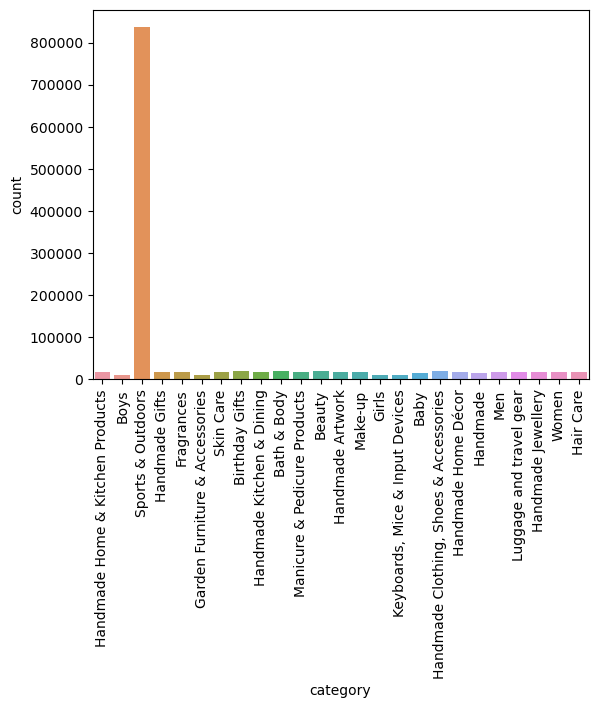

In [44]:
#Visualizations:

#Display the distribution of products across different categories using a bar chart. 
#If you face problems understanding the chart, do it for a subset of top categories. 


value_counts = df['category'].value_counts()
top_N = 25 
subset = value_counts[:top_N].index

# Filter the DataFrame to include only the rows with the subset values
subset_df = df[df['category'].isin(subset)]

ax = sns.countplot(data=subset_df, x='category')

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')

# Display the plot
plt.show()



<Axes: ylabel='count'>

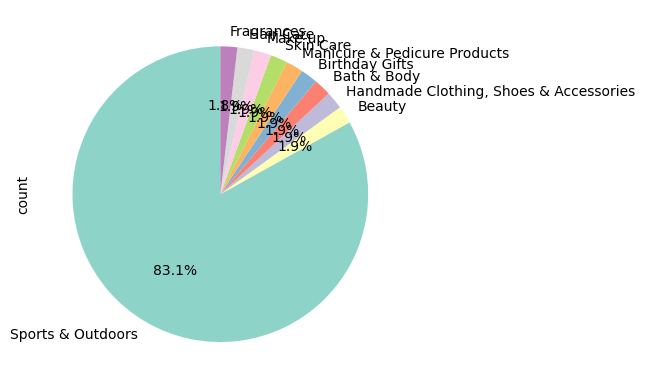

In [15]:
#For a subset of top categories, visualize their proportions using a pie chart. 

subset_df['category'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))

### Does any category dominate the listings? 
Clearly Sports & Outdoors is by very far dominant with 83% of the subset. The second one is only less that 2%

## Part 2: Delving into Product Pricing

Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?



In [17]:
# Measures of Centrality:

#Calculate the mean, median, and mode for the price of products.

mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()

mean_price, median_price, mode_price


(89.24380943923663,
 19.09,
 0    9.99
 Name: price, dtype: float64)

### What's the average price point of products listed? How does this compare with the most common price point (mode)?

The average price is 89.24.
It is far higher thangt the mode price (9.99)



In [23]:



#Measures of Dispersion:

#Determine the variance, standard deviation, range, and interquartile range for product price.

df['price'].describe()

formatted_data = df['price'].describe().apply(lambda x: '{:,.0f}'.format(x))

# Print the formatted result
print(formatted_data)






count    2,443,651
mean            89
std            346
min              0
25%             10
50%             19
75%             46
max        100,000
Name: price, dtype: object


In [28]:
variance_price = df['price'].var()
range_price = df['price'].max()- df['price'].min()

variance_price, range_price

(119445.4853225653, 100000.0)

### How varied are the product prices? Are there any indicators of a significant spread in prices?

The product prices are very highly varied, with a standard deviation that is of 346 whereas the median is 19 and the mean 89. We also have a range of 100,000. 


### Visualizations:

#### Is there a specific price range where most products fall?
1st guess is between 10 and 46 wich is the IQR. But my intuition is that maybe 90% of prices may fall in a not so much higher price range.

#### Plot a histogram to visualize the distribution of product prices. 
#### If its hard to read these diagrams, think why this is, and explain how it could be solved..

indeed, the spread in prices is so significant that the graph is not relevant with all values. Working with a subset can solution this. 



In [53]:
quantiles_price = df['price'].quantile([0.1,0.2,0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.95])
quantiles_price

#it confirms my intuition than 90% of the product is on a range not so significant compared to the whole data

0.10      5.99
0.20      8.99
0.30     11.77
0.40     14.99
0.50     19.09
0.60     25.49
0.70     36.00
0.80     60.49
0.95    349.50
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

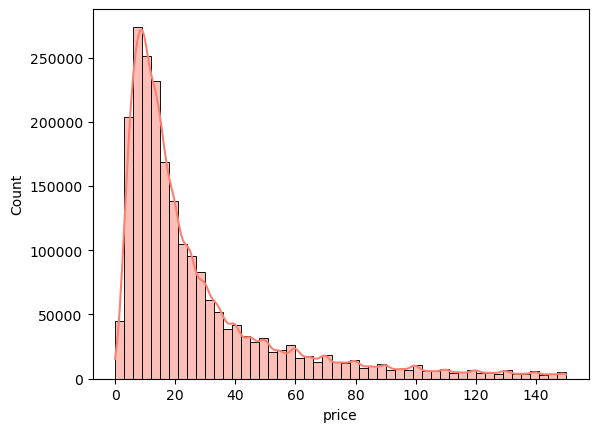

In [38]:
#thus I plot only on these 90%, the 10% remaining being to widespread to be visualized. 

price_filtered_df = df[(df['price'] <= 149.99)]


sns.histplot(price_filtered_df['price'], kde=True, bins=50, color="salmon")


<Axes: xlabel='price', ylabel='category'>

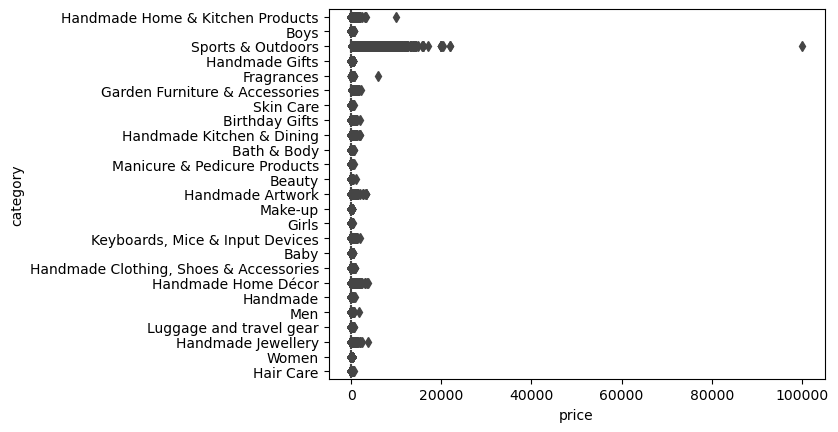

In [45]:
# Are there products that are priced significantly higher than the rest? 
# Use a box plot to showcase the spread and potential outliers in product pricing.

sns.boxplot(data=subset_df, y = 'category', x = 'price')

There are very significant outlier since the box plot is not really readable. There is one in sports and outdoor ate 100000 that makes visualization not relevant. Also, there are few outliers above 20000

In [54]:
subset_price_filtered_df = subset_df[(subset_df['price'] <= 350)]

<Axes: xlabel='price', ylabel='category'>

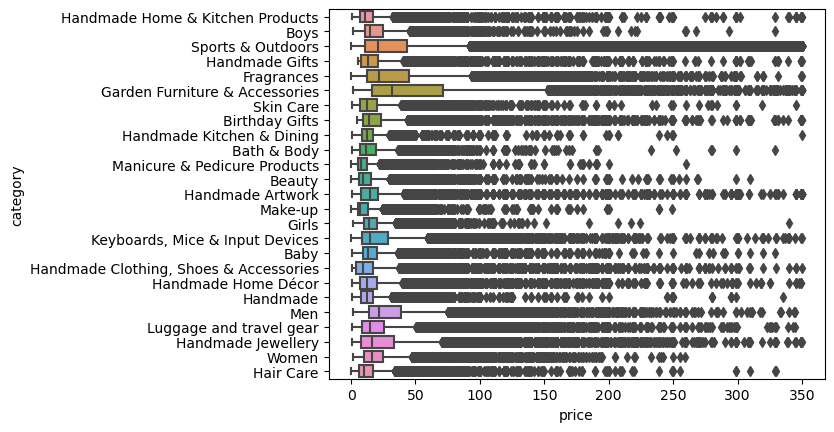

In [55]:
sns.boxplot(data=subset_price_filtered_df, y = 'category', x = 'price')

Even with subsetting on the top25 categories and the 0.95 quantile of prices, the graph shows that there remains a lot of outliers in all the categories. 

In [56]:
subset_price_filtered_df_90 = subset_df[(subset_df['price'] <= 149.99)]

<Axes: xlabel='price', ylabel='category'>

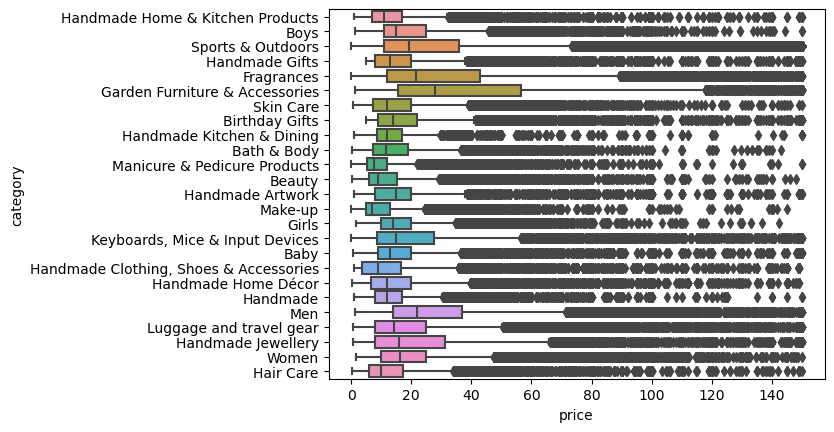

In [57]:
sns.boxplot(data=subset_price_filtered_df_90, y = 'category', x = 'price')

Same with keeping the 0,9 quantile in prices. A bit more readable but a lot of outliers.